# Introduction to SKlearn

### This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

#### What we're going to cover:
#### 1. An end-to-end Scikit-Learn workflow
#### 2. Getting the data ready
#### 3. Choose the right estimator/algorithm for our problems
#### 4. Fit the model/algorithm and use it to make predictions on our data
#### 5. Evaluating a model
#### 6. Improve a model
#### 7. Save and load a trained model
#### 8. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [2]:
#Get the data ready
import pandas as pd 
import numpy as np
heart_disease = pd.read_csv(r'C:\Users\eliya\OneDrive\Desktop\Data_Science_Projects\Data_Science_Udemy\scikit-learn data\heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [228]:
# Create X (feature matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [229]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [230]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [231]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [232]:
# Make a prediction on the test data
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [233]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [234]:
# 4. Evaluate the model on the training and test data
clf.score(X_train, y_train)

1.0

In [235]:
clf.score(X_test, y_test)

0.819672131147541

In [236]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [237]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 6, 26]], dtype=int64)

In [238]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [239]:
# 5. Improve a model
# Try diffrent ammont of n_estimators
np.random.seed(42)
for i in range (10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100 :.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%

Trying model with 20 estimators...
Model accuracy on test set: 80.33%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 86.89%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 83.61%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [240]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

C:\Users\eliya\AppData\Local\Temp\ipykernel_28128\3364441119.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))


In [241]:
import warnings
warnings.filterwarnings('default')

In [242]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.12 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 19:09:20) [MSC v.1916 64 bit (AMD64)]
executable: c:\Users\eliya\miniconda3\envs\basic_env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.24.3
        scipy: 1.11.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\eliya\miniconda3\envs\basic_env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 14
threading_layer: intel

       filepath: C:\Users\eliya\miniconda3\envs\basic_env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 20

       filepath: C:\Users\eliya\miniconda3\envs\basic_env\Library\bin\libiomp5md.dll
   

In [243]:
what_were_covering = [
    "1. An end-to-end Scikit-Learn workflow",
    "2. Getting the data ready",
    "3. Choose the right estimator/algorithm for our problems",
    "4. Fit the model/algorithm and use it to make predictions on our data",
    "5. Evaluating a model",
    "6. Improve a model",
    "7. Save and load a trained model",
    "8. Putting it all together!"]

In [244]:
what_were_covering

['1. An end-to-end Scikit-Learn workflow',
 '2. Getting the data ready',
 '3. Choose the right estimator/algorithm for our problems',
 '4. Fit the model/algorithm and use it to make predictions on our data',
 '5. Evaluating a model',
 '6. Improve a model',
 '7. Save and load a trained model',
 '8. Putting it all together!']

## 1.Getting our data ready to be used with machine learning
Three main things we have to do:
    
    1. Split the data into features and labels (usually 'X' and 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)


In [245]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [246]:
X - heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [247]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [248]:
# Split the data ino training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [249]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.Make sure it's all numerical

In [250]:
car_sales = pd.read_csv(r"C:\Users\eliya\OneDrive\Desktop\Data Science Projects\Data Science Udemy\scikit-learn data\car-sales-extended.csv")

In [251]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [252]:
len(car_sales)

1000

In [253]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [254]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                    y, test_size=0.2)

In [255]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [256]:
# Turn the categorical data into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot, 
                                   cat)], 
                                   remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [257]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [258]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [259]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [260]:
# Let's retry to fit our model with our new-numerical data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)                                                    

0.314781379383973

### What if you have missing values in your data set?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [261]:
# import car sales missing data
car_sales_missing = pd.read_csv(r"C:\Users\eliya\OneDrive\Desktop\Data Science Projects\Data Science Udemy\scikit-learn data\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [262]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [263]:
# Create X, y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [264]:
# Let's try and convert our data to numbers:
# Turn the categorical data into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot, 
                                   cat)], 
                                   remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: fill missing values with Pandas

In [265]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [266]:
# Cheack the DataFrame now:
car_sales_missing.isna().sum() 

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [267]:
# Remove rows with missing Price values:
car_sales_missing.dropna(inplace=True)
len(car_sales_missing)

950

In [268]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [269]:
# Let's try and convert our data to numbers:
# Turn the categorical data into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot, 
                                   cat)], 
                                   remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing values with Scikit-Learn

In [270]:
car_sales_missing = pd.read_csv(r"C:\Users\eliya\OneDrive\Desktop\Data Science Projects\Data Science Udemy\scikit-learn data\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [271]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [272]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [273]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2)


In [274]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [275]:
# Fill categorical data with "missing" and numerical data with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
num_imputer = SimpleImputer(strategy = "mean")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)

In [276]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

In [277]:
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['BMW', 'Blue', 3.0, 142189.0],
       ['Toyota', 'White', 4.0, 201039.0],
       ['Honda', 'White', 4.0, 131685.74931129476],
       ...,
       ['Nissan', 'White', 4.0, 102303.0],
       ['Toyota', 'Blue', 4.0, 221076.0],
       ['Toyota', 'White', 4.0, 188755.0]], dtype=object)

In [278]:
# Get the transformed data array back into DataFrame'set
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test,
                                        columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [279]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [280]:
# Now let's OneHotEncode the categorical features with the same code as before
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)], 
                                  remainder="passthrough") 

#Fill train and test values separately
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)

# Check transformed and filled X_train
transformed_X_train

<760x16 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [281]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Make sure to use transformed (filles and OneHotEncoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

For now, the key takeaways to remember are:

Most datasets you come across won't be in a form ready to immediately start using them with machine learning models. And some may take more preparation than others to get ready to use.
For most machine learning models, your data has to be numerical. This will involve converting whatever you're working with into numbers. This process is often referred to as **feature engineering** or **feature encoding**.
Some machine learning models aren't compatible with missing data. The process of filling missing data is referred to as **data imputation**.

## 2. Chossing the right estimator/algorithem for your problem

Some thing to note:

* Sklearn refers to ML models, algorithms as estimators
* Classification problem - predicting a category (..)
*

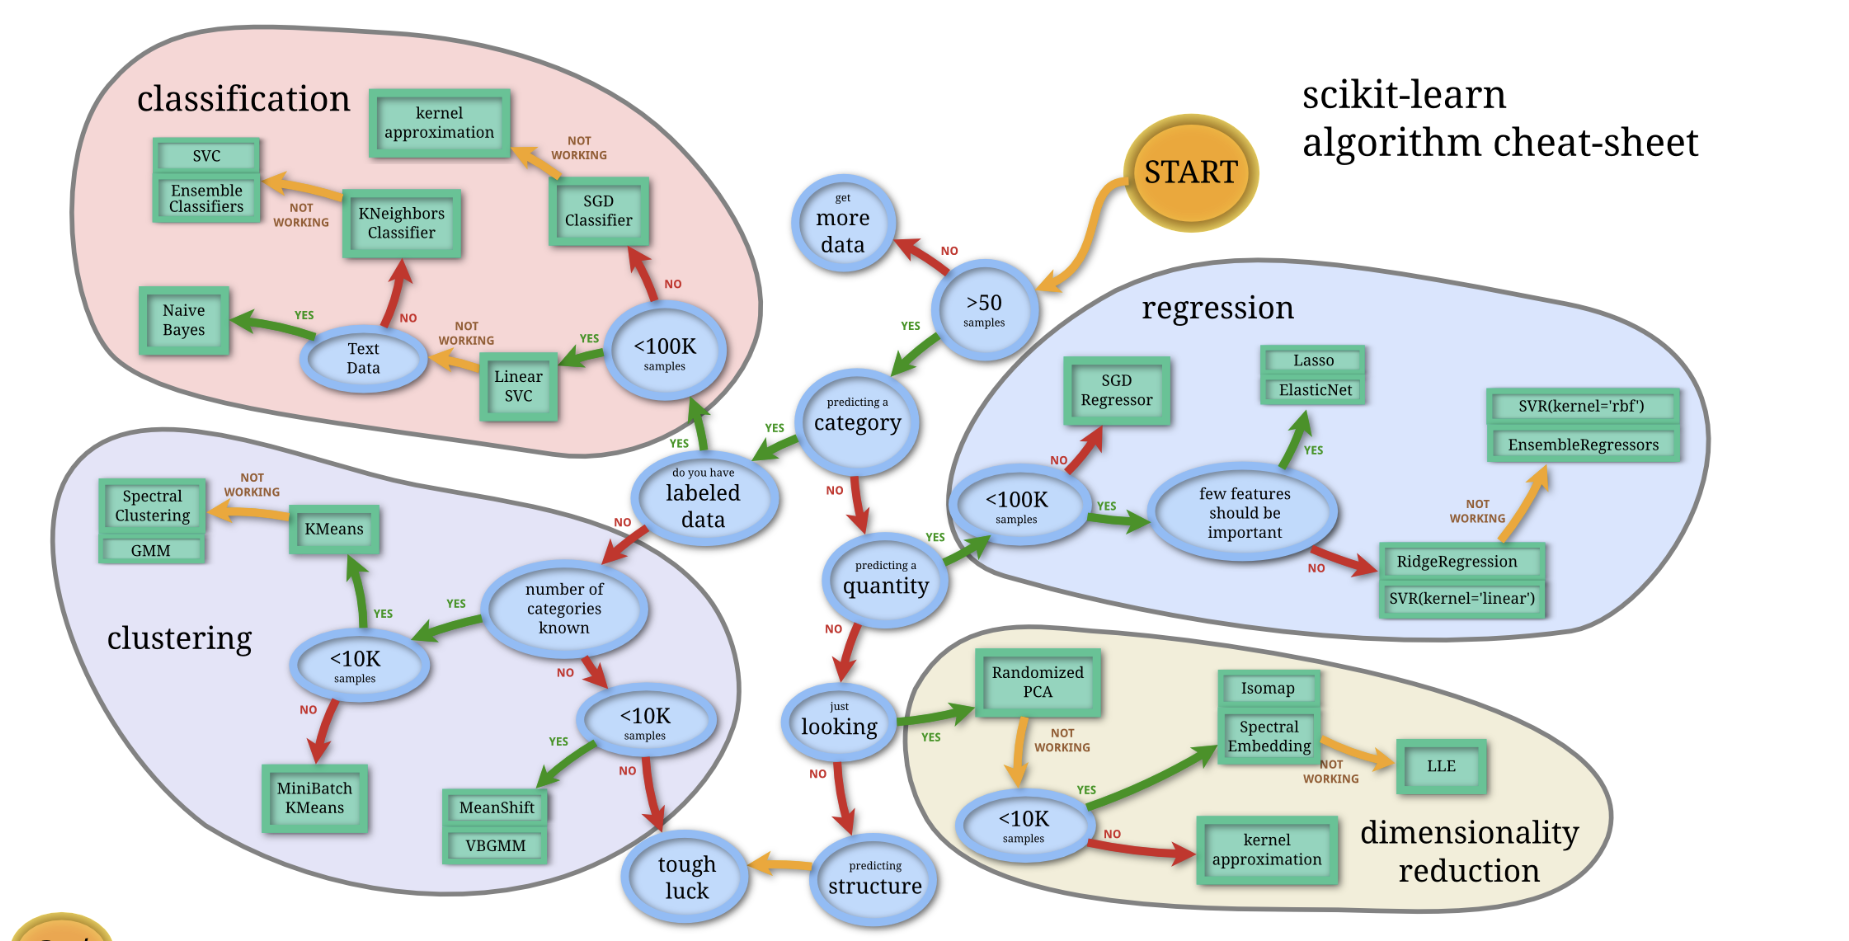

### 2.1 Picking a ML nodel for a regression problem

Let's use the California Housing dataset

In [282]:
# Get California.Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [283]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [284]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [285]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # y is the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit the model (On the training set)
model = Ridge()
model.fit(X_train, y_train)

#Check the score on the X_test
print(f"Linear Ridge model score is {model.score(X_test, y_test)}")


Linear Ridge model score is 0.5758549611440126


#### Let's try another ensemble model (an ensemble is combination of smaller models to try and predict a better model than one model alone)

In [286]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor


# Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Check the score of the model
print(f" the RF model score is {rf.score(X_test, y_test)}")    

 the RF model score is 0.8065734772187598


### 2.2 Picking a ML model for Classification Problem

Let's use the map - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [287]:
heart_disease = pd.read_csv(r"C:\Users\eliya\OneDrive\Desktop\Data Science Projects\Data Science Udemy\scikit-learn data\heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [288]:
len(heart_disease) #It is greater than 50. it is a category, we got a labeld data let's...

303

#### LinearSVC

In [289]:
# Import Linear SVC
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate LinearSVC
clf = LinearSVC(max_iter = 10000)
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
score = clf.score(X_test, y_test)
print(f"Accuracy for LinearSVC: {score * 100:.2f}%")

Accuracy for LinearSVC: 86.89%


c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Now let's try another one RandomForestClassifier

In [290]:
# Import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate the RandomForestClassifier
score = clf.score(X_test, y_test)
print(f"Accuracy for LinearSVC: {score * 100:.2f}%")


Accuracy for LinearSVC: 85.25%


## 3. Fit the model to the data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* 'X' = features, variables, data.
* 'y' = labels, targets, target variables.

In [291]:
# Import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
score = clf.score(X_test, y_test)
print(f"Accuracy for LinearSVC: {score * 100:.2f}%")

Accuracy for LinearSVC: 85.25%


In [292]:
pd.DataFrame(X).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [293]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [294]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3]))

c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test) # That's our prediction Accuracy (how many times we made it right)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with predict_proba()

In [ ]:
# predict_proba returns probabilities of the target variable
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# Let's predict() on the same data...
clf.predict(X_test[:5]).reshape(5,1) 

array([[0],
       [1],
       [1],
       [0],
       [1]], dtype=int64)

In [ ]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


'predict()' can also be used for regression models

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the model to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

#Fit the model to the data
model.fit(X_train, y_train)

#Make predictions
y_preds = model.predict(X_test)

In [ ]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [ ]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) # We want it as small as possible

0.32659871732073664

## 4. Evaluate a Machine Learning model

three ways to evaluate Scikit-Learn models\estimators:

    1. Estimator's built in 'score()' method

    2. The 'scoring' parameter
    
    3. problem - specific metric functions

You can read more about it here: 


### 4.1 Evaluating a model with the score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore', message='np.find_common_type is deprecated')

np.random.seed(42)

# Create X, y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train\test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# The highest score is 1.0 (only for trained data) the lowest is 0.0

#Make a prediction
y_preds = clf.predict(X_test)

# Evaluate the classifier
clf.score(X_test, y_test)

0.8524590163934426

#### Let's use the score() on our regression problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the model to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

#Fit the model to the data
model.fit(X_train, y_train)

#Make predictions
y_preds = model.predict(X_test)

In [ ]:
# the default score() evaluation metric is r_squared for regression algorithms.
model.score(X_test, y_test) # That's for 100 estimators

0.8065734772187598

In [ ]:
model.score(X_test, y_test) # That's for 2 estimators

# Hence, the more estimators the more accuracy!

0.8065734772187598

In [ ]:
y_test.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64>

### 4.2 Evaluating a model using scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X, y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train\test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [ ]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [ ]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Scoring parameter set to None by default.
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
  1. Accuracy
  2. Area under ROC curve
  3. Confusion matrix
  4. Classification report

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [ ]:
np.mean(cross_val_score)

0.8248087431693989

In [ ]:
print(f"Heart Disease Classifier CV Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier CV Accuracy: 82.48%


#### Area under ROC(receiver operating characteristic) curve

1. Area under curve (ROC)
2. ROC curve

ROC curves are a comparison of a model's true positive rate (TPR) verdud a modes false positives rate (FPR)

* True positive = model predicts 1 when truth is 1
* False positive - model predicts 1 when truth is 0
* True negatives - model predicts 0 when truth is 0 
* False negative - model predicts 0 when truth is 1

In [ ]:
# Create X_test ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [ ]:
# Calc FPR, TPR, Threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

# Cheack the flase positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

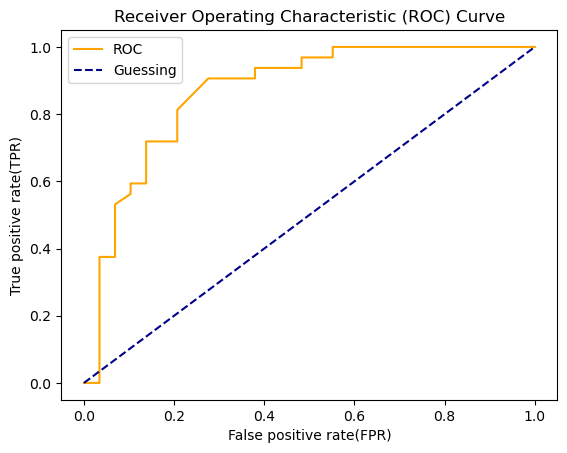

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """"
    Plots a ROC curve given the PFR and TPR of a model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label = "ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate(FPR)")
    plt.ylabel("True positive rate(TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

### Of course the best ROC point is the **lowest** FPR and **highest** TPR

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive) # Maximum area under curve is 1

0.8669181034482759

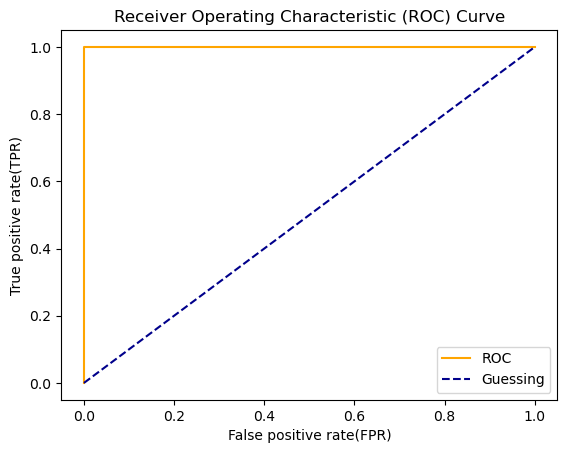

In [ ]:
# Plot perfect ROC curve and AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [ ]:
#Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it supposed to.

In essence: giving you an ides of where the model is getting confused

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [ ]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [ ]:
22+7+8+24 == len(X_test) # Sanity check

True

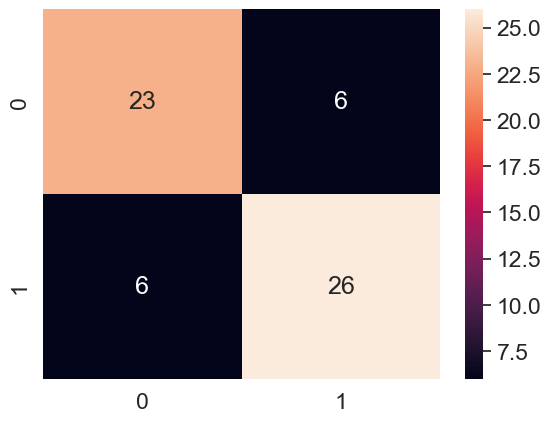

In [ ]:
# Make our confusion matrix more visual with sns heatmap
import seaborn as sns

sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True);

**Classification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
# Where precision and Recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                   disease_preds, 
                                   output_dict=True))

c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 4.2.2 Regression model evaluation metrics

documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The one's we're going to cover are:
1. R^2 or coeffiecient of determination
2. Mean absolute error
3. Mean squared error

### R^2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model =  RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
model.score(X_test, y_test) # That's R^2

0.8065734772187598

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
y_test.mean()

2.0550030959302323

In [ ]:
from sklearn.metrics import r2_score

#Fill an array with the t_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [ ]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [ ]:
r2_score(y_true = y_test, 
         y_pred = y_test_mean)

0.0

In [ ]:
r2_score(y_true = y_test, 
         y_pred = y_test)

1.0

### MAE

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [ ]:
df = pd.DataFrame(data={"actual values":y_test, 
                        "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [ ]:
#MAE using formulas and math
np.abs(df["differences"]).mean()

0.32659871732073664

In [ ]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [ ]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

### MSE
Is the mean of the squared of the error between actual and predicted

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [ ]:
df["squared_differences"]= np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [ ]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [ ]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [ ]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [ ]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2573437523766412

In [ ]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [ ]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.7334180712088106

### 4.2.3 Finally using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

### None and Accuracy

In [ ]:
np.random.seed(42)

#Cross val accuracy
cv_acc = cross_val_score(clf, X, y, cv=10, scoring=None) # if scoring=None we get accuracy
cv_acc

array([0.80645161, 0.80645161, 0.87096774, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.76666667])

In [ ]:
# Cross-validation accuracy
print(f"The cross-validation accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is: 81.84%


In [ ]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
cv_acc

array([0.80645161, 0.80645161, 0.87096774, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.76666667])

In [ ]:
# Cross-validation accuracy
print(f"The cross-validation accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is: 81.84%


### Precision

In [ ]:
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=10, scoring="precision")
cv_precision

array([0.78947368, 0.82352941, 0.88235294, 0.9375    , 0.85      ,
       0.92307692, 0.75      , 0.78947368, 0.7       , 0.73684211])

In [ ]:
# Cross-validation accuracy
print(f"The cross-validation precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validation precision is: 81.82%


### Recall

In [ ]:
#Recall 
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=10, scoring="recall")
cv_recall

array([0.88235294, 0.82352941, 0.88235294, 0.88235294, 1.        ,
       0.75      , 0.75      , 0.9375    , 0.875     , 0.875     ])

In [ ]:
# Cross-validation accuracy
print(f"The cross-validation recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validation recall is: 86.58%


### Let's see the `scoring` parameter in action

In [295]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [296]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [297]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [303]:
# Mean absoluite error
cv_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
np.mean(cv_mae)

-0.46556157607073645

In [302]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv =5 )
np.mean(cv_mse)

-0.4290450602466023

## 4.3 Using different evaluating metrics as Scikit-Learn functions

the 3rd way of evaluating Scikit-Learn models/estimators is using different `metrics functions`

In [311]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
precision: 84.85%
Recall: 87.50%
F1: 86.15%


In [316]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make some predictions
y_preds1 = model.predict(X_test)

# Evaluate the classifier
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds1)*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test, y_preds1)*100:.3f}%")
print(f"MSE: {mean_squared_error(y_test, y_preds1)*100:.3f}%")


Regression metrics on the test set
R2 score: 79.685%
MAE: 33.131%
MSE: 26.219%


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

from a data perspective:
* Could we collect more data? (generally, the moree data, the better)
* Could we improve our data?

from a model perspective:
* Is there a better model we can use?
* Could we improve the current model?(Usually in hyperparameters)

#### Parameters VS. Hyperparameters:
* Parameters = model find these patterns in data
* Hyperparameters = setting on a model you can adjust to (potentially) improve the ability to fing patterns.


Three ways to tune hyperparamets:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [318]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()


In [320]:
clf.get_params() # get the parameters of the model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparametrs by hand

Let's make 3 sets train, validation and test

In [322]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust the following:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [335]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                    "precision": round(precision, 2),
                    "recall": round(recall, 2),
                    "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")           
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
            
    return metric_dict

In [336]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle th data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Splir the data to train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split+0.15*len(heart_disease_shuffled)) #15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Make baseline prediction
y_preds = clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [361]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=1000)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_test)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_test, y_preds_2)

Acc: 80.33%
Precision: 0.75
Recall: 0.86
F1 score: 0.80


In [339]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(max_depth = 3)
clf_3.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(X_test)

# Evaluate the 2nd classifier
clf_3__metrics = evaluate_preds(y_test, y_preds_3)

Acc: 84.78%
Precision: 0.88
Recall: 0.84
F1 score: 0.86


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [345]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ['auto', 'sqrt'],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4] 
        }

np.random.seed(42)

#Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try``
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_

In [346]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [347]:
# Mak predictions with the best Hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameters tuning using GridSearchCV

In [348]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [353]:
grid_2 = {'n_estimators': [100, 200, 500,],
          'max_depth': [None],
          'max_features': ['sqrt', 'auto'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]
          }

In [354]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GrisSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None,

c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\eliya\miniconda3\envs\basic_env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_

In [355]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [357]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### the best model for each evaluation metric visually
Let's compare our different models metrics

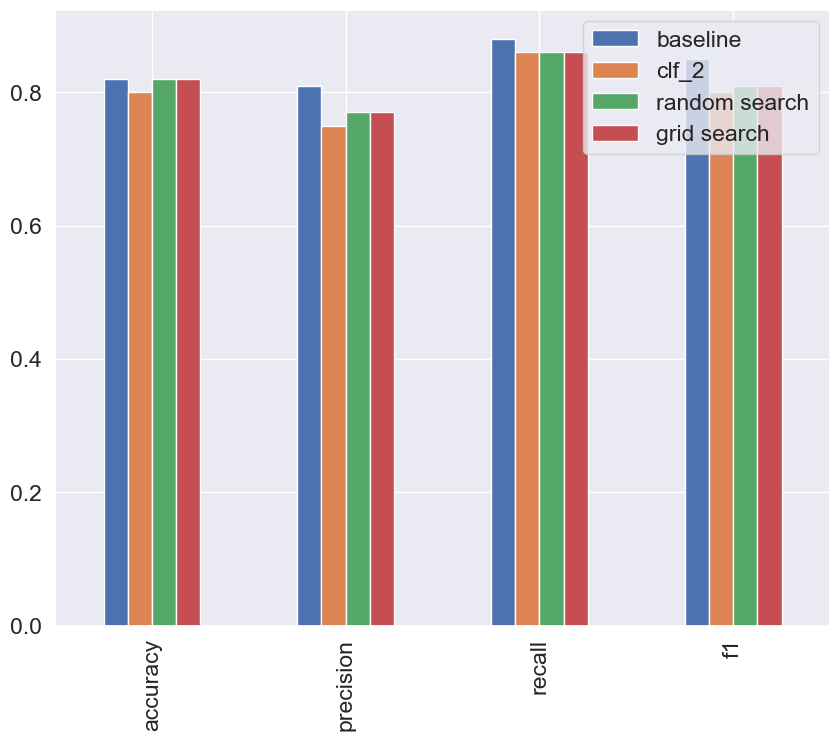

In [363]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2" : clf_2_metrics,
                                "random search" : rs_metrics,
                                "grid search": gs_metrics
                                })

compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and Loading trained machine learning Models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

In [367]:
import pickle 

# Save the model as a pickle in a file
pickle.dump(gs_clf, open('gs_random_forest_model.pkl', 'wb'))

C:\Users\eliya\AppData\Local\Temp\ipykernel_28128\3342848862.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_model.pkl'>
  pickle.dump(gs_clf, open('gs_random_forest_model.pkl', 'wb'))


In [370]:
# Load a saved model 
loaded_pickle_model = pickle.load(open('gs_random_forest_model.pkl', 'rb'))

C:\Users\eliya\AppData\Local\Temp\ipykernel_28128\2150263911.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_forest_model.pkl'>
  loaded_pickle_model = pickle.load(open('gs_random_forest_model.pkl', 'rb'))


In [372]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together!

In [376]:
data = pd.read_csv(r"C:\Users\eliya\OneDrive\Desktop\Data Science Projects\Data Science Udemy\scikit-learn data\car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [378]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [379]:
data.isna().sum() #All data should be numerical, remember

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we wnt to do (all code in one cell):
1. fill missing data
2. convert non-numerical data to numerical data
3. build a model on the data

In [380]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv(r"C:\Users\eliya\OneDrive\Desktop\Data Science Projects\Data Science Udemy\scikit-learn data\car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])    # ignore unknown categories

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [383]:
### Let's use some of our 

In [390]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV with our regression Pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": [1],
    "model__min_samples_split": [2, 4]
    }

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model_

In [391]:
gs_model.score(X_test, y_test);

In [392]:
what_were_covering

['1. An end-to-end Scikit-Learn workflow',
 '2. Getting the data ready',
 '3. Choose the right estimator/algorithm for our problems',
 '4. Fit the model/algorithm and use it to make predictions on our data',
 '5. Evaluating a model',
 '6. Improve a model',
 '7. Save and load a trained model',
 '8. Putting it all together!']